# HR Analytics Project

- A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

# Objective

- Predicting Employee Attrition Using Machine Learning

In [67]:
#Importing Necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import joblib as jl
from joblib import dump,load
import warnings
warnings.filterwarnings("ignore")


# Data Exploration

In [137]:
#Loading Dataset

df = pd.read_csv(r'E:\WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
#Checking Shape of our Dataset

df.shape


(1470, 35)

In [7]:
#Checking for Data types/null values etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [20]:
df.value_counts('Attrition')

Attrition
No     1233
Yes     237
dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

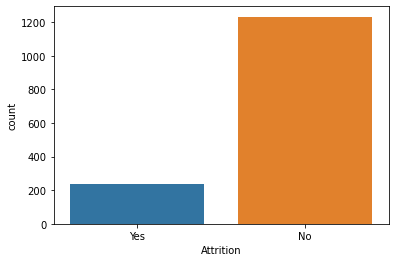

In [132]:
sns.countplot(x="Attrition",data=df)

In [22]:
#Statistical Description of Data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


<AxesSubplot:>

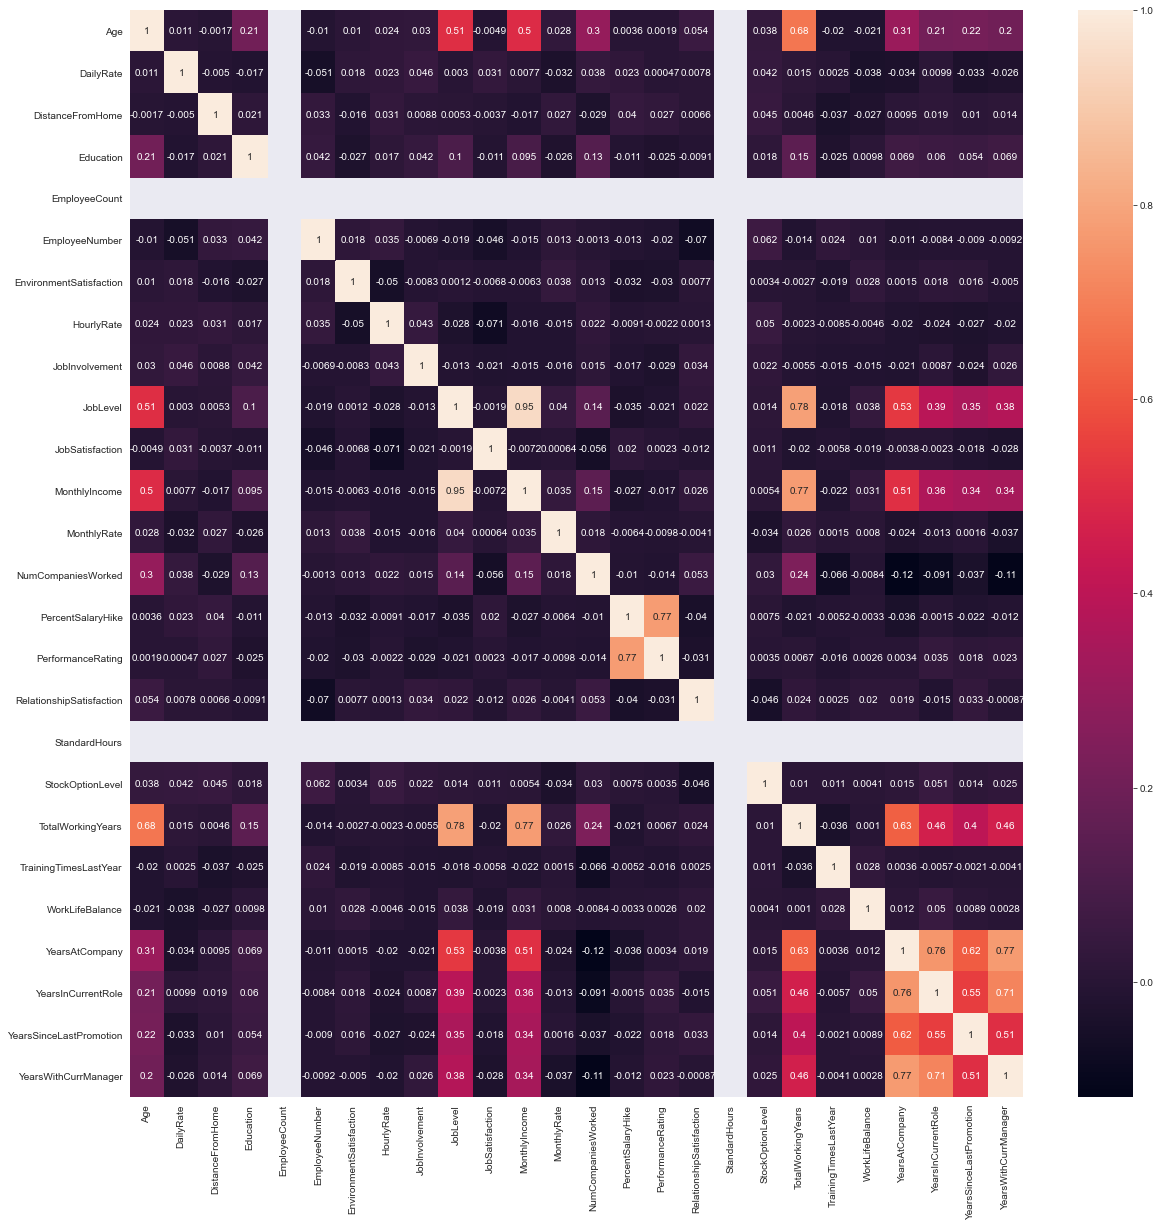

In [222]:
#Defining correlation using HeatMap
sns.set_style("darkgrid")
plt.figure(figsize=(20,20))
corr = df.corr()
sns.heatmap(corr, annot=True)

In [134]:
#Function For Plotting Distribution of Numerical Variable and its affect on attirition

def NV_TP(df,segment,target="Attrition"):
    
    fig,ax=plt.subplots(ncols=2,figsize=(14,7))
    sns.boxplot(x = target, y = segment, data=df, ax=ax[0])
    ax[0].set_title("Comparision of " + segment + " vs " + target)
    
    #distribution plot
    ax[1].set_title("Distribution of "+segment)
    ax[1].set_ylabel("Frequency")
    sns.distplot(a = df[segment], ax=ax[1], kde=False)
    
    plt.show()

# Analyzing the Variables:
 - Numerical

# AGE

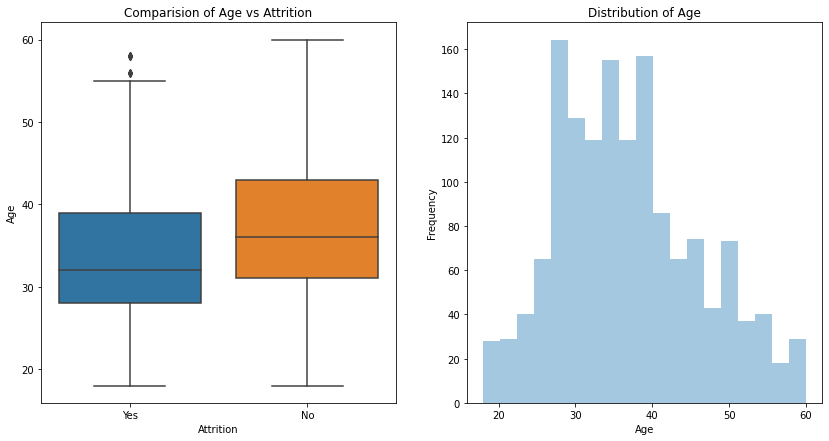

In [33]:
#Checking Distribution of Age and it's related to attirition or not
NV_TP(df,segment="Age")

 - Median age of Employees is 30-40yrs.Minimum age is 18yrs and max. is 60 yrs.
 - From boxplot we conclude that majority of people who Quit the job are below 40yrs.
 - People who did not quit are of age 32 to 40yrs.

# Daily Rate and Monthly Income and Hourly Rate

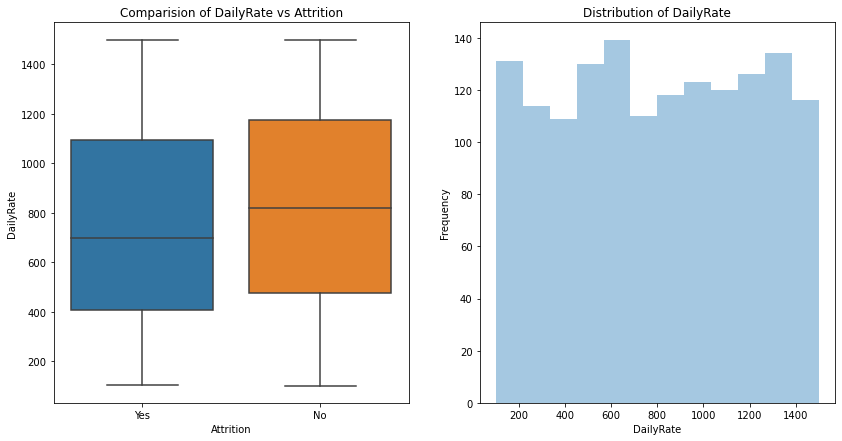

In [35]:
NV_TP(df,segment="DailyRate")

# Monthly Rate

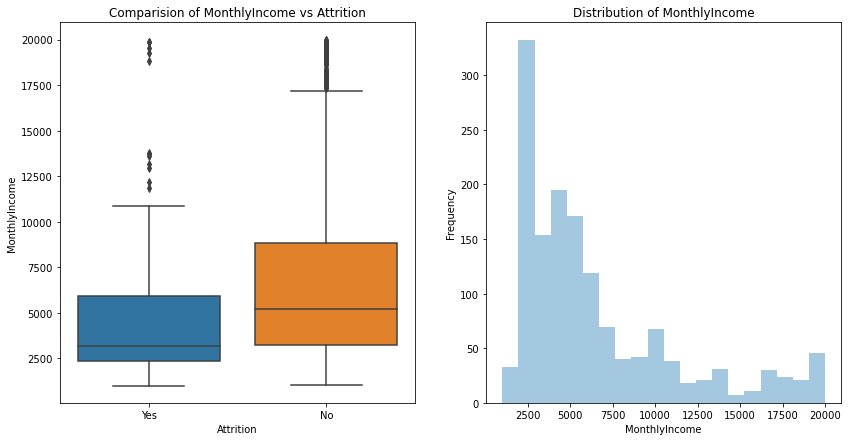

In [37]:
NV_TP(df,segment="MonthlyIncome")

- Employees working with lower daily rate quits the job more , than compared with employees having high Daily Rates
- Same trend is with monthly income too

# Hourly Rate


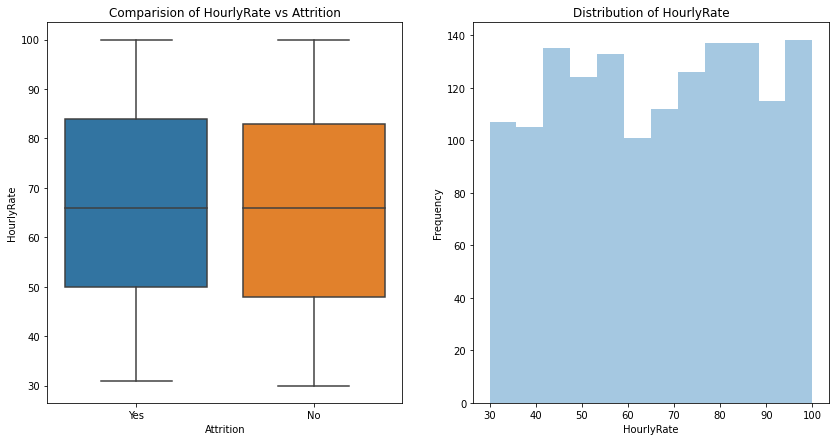

In [38]:
NV_TP(df,segment="HourlyRate")

 - There is no significant in hourly rate and attirition.Thus, it is not considered as significant to attirition

# Percent Salary Hike

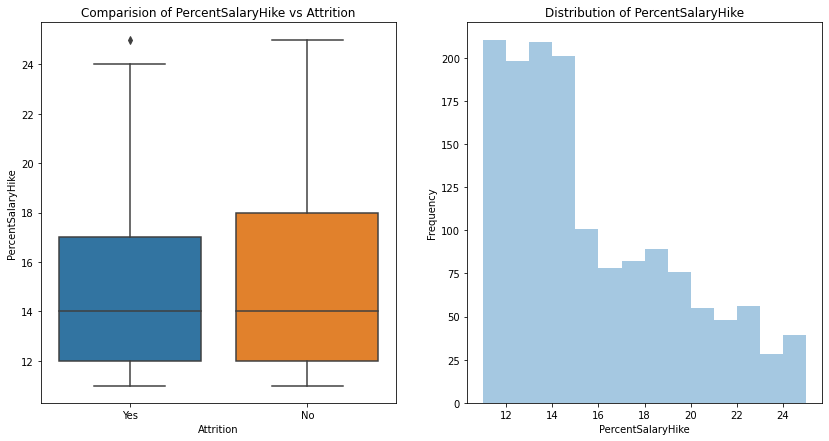

In [40]:
NV_TP(df,segment="PercentSalaryHike")

- Employees with less salary hike have left the company

# Total Working years

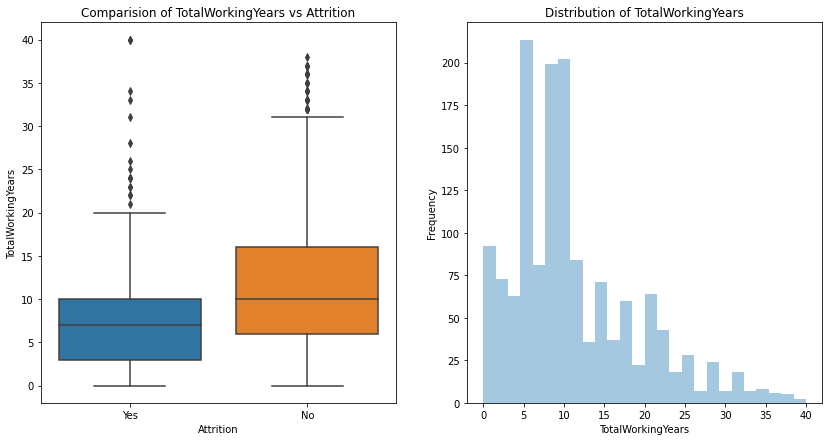

In [41]:
NV_TP(df,segment="TotalWorkingYears")

- Employees who spent more time in company are more loyal to their jobs and haven't left

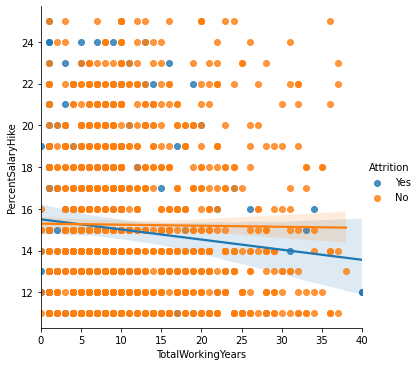

In [42]:
sns.lmplot(x="TotalWorkingYears",y="PercentSalaryHike",data=df,hue="Attrition")

 - Employees with less working years getting upto 25% salary hike when they switch to another company.
 - Attrition is not seen among employees having more than 20yrs of Experience
 - Employees with less experience quits company easily in search for better jobs.

# Distance From Home

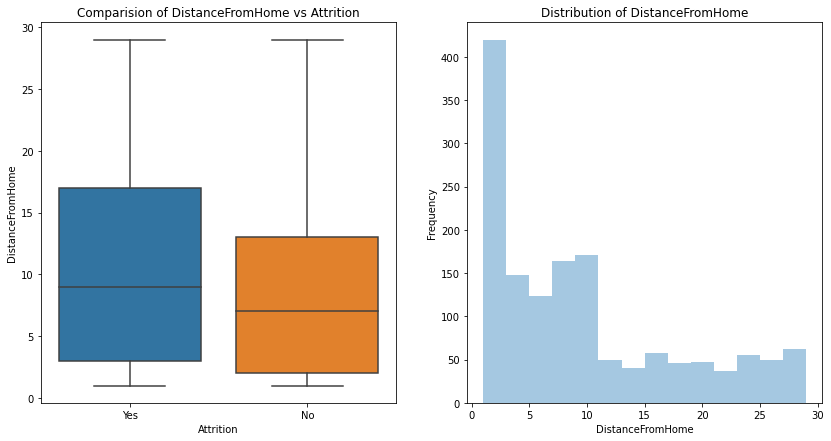

In [43]:
NV_TP(df,segment="DistanceFromHome")

- Distance between office to employee home affects attrition rate
- More than 10kms distance trigger an employee to leave the company

# Years With Curr Manager

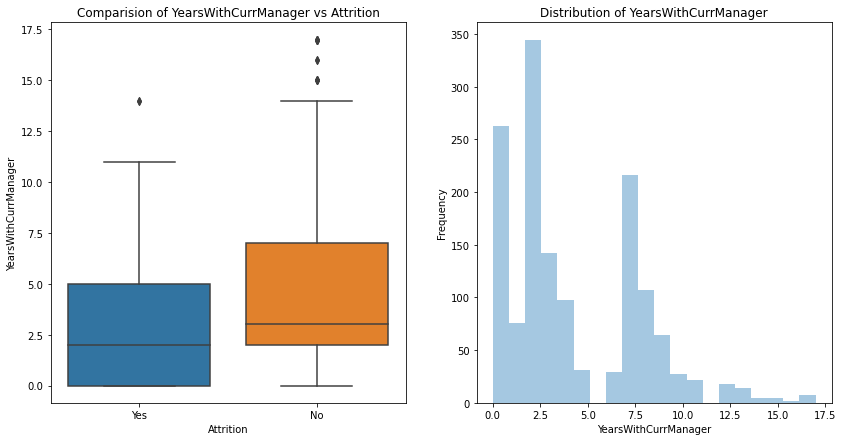

In [100]:
NV_TP(df,segment="YearsWithCurrManager")

# YearsSinceLastPromotion

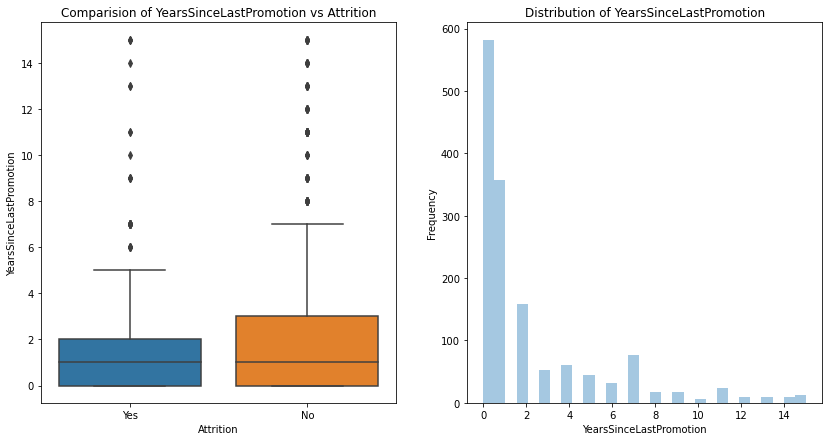

In [101]:
NV_TP(df,segment="YearsSinceLastPromotion")

# Analysing Categorical Variables

# BusinessTravel

In [106]:
df.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

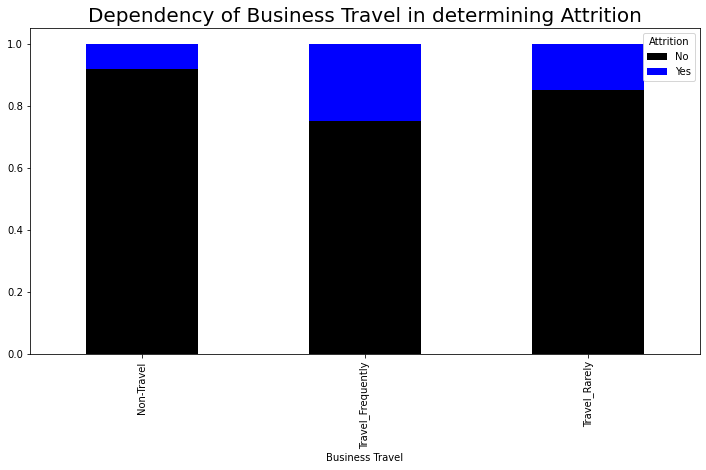

In [82]:
data=pd.crosstab(df['BusinessTravel'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['black', 'blue'], 
                                                figsize=(12,6))
plt.title('Dependency of Business Travel in determining Attrition', fontsize=20)
plt.xlabel('Business Travel')
plt.show()

- Jobs where Travel frequency is high is having high attrition rate

# Job Involvement

In [44]:
#Cross Tabulation between Job invovement and Attrition
pd.crosstab(df.JobInvolvement,df.Attrition)

Attrition,No,Yes
JobInvolvement,,
1,55,28
2,304,71
3,743,125
4,131,13


In [47]:
#Calculating Percentage of People Having Different Job Involvement Rate
round(df.JobInvolvement.value_counts()/df.shape[0]*100,2)

3    59.05
2    25.51
4     9.80
1     5.65
Name: JobInvolvement, dtype: float64

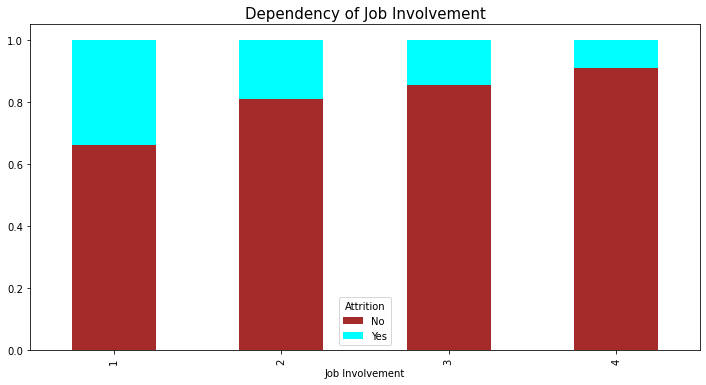

In [81]:
data=pd.crosstab(df['JobInvolvement'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['brown', 'cyan'], 
                                                figsize=(12,6))
plt.title('Dependency of Job Involvement', fontsize=15)
plt.xlabel('Job Involvement')
plt.show()

- Less Job Involvement Having High Atrrition

# JobRole

In [105]:
df.JobRole.value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

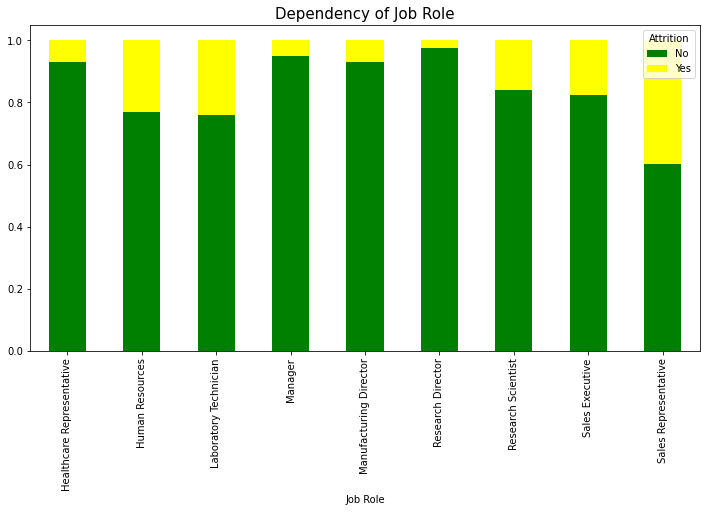

In [92]:
data=pd.crosstab(df['JobRole'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['green', 'yellow'], 
                                                figsize=(12,6))
plt.title('Dependency of Job Role', fontsize=15)
plt.xlabel('Job Role')
plt.show()

# Attrition Rate is High for :
 - Sales Representative
 - Sales Executive
 - Human Resources
 - Laboratory Technician

# Department

In [104]:
df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

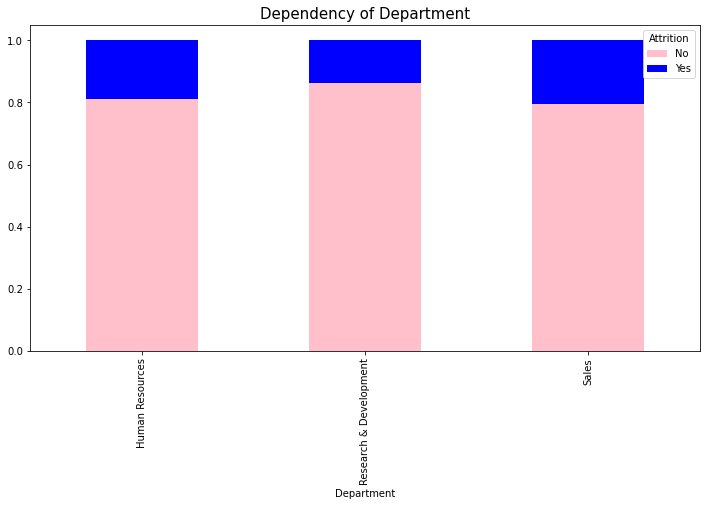

In [94]:
data=pd.crosstab(df['Department'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['pink', 'blue'], 
                                                figsize=(12,6))
plt.title('Dependency of Department', fontsize=15)
plt.xlabel('Department')
plt.show()

# OverTime

In [103]:
df.OverTime.value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

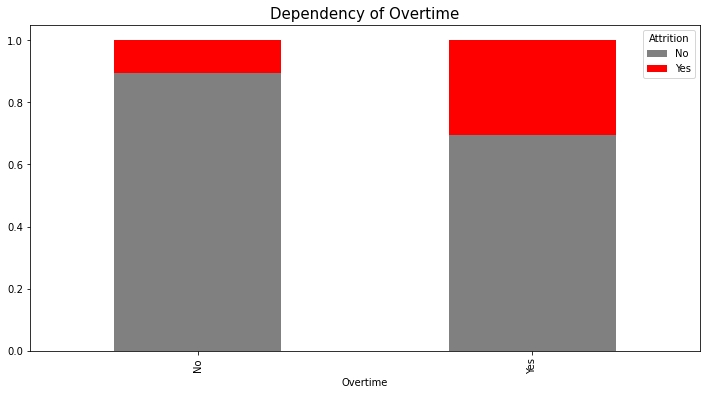

In [96]:
data=pd.crosstab(df['OverTime'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['grey', 'red'], 
                                                figsize=(12,6))
plt.title('Dependency of Overtime', fontsize=15)
plt.xlabel('Overtime')
plt.show()

 - Companies where there is condition of Overtime faces high Attrition Rate

# Relationship Satisfaction

In [102]:
df.RelationshipSatisfaction.value_counts()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

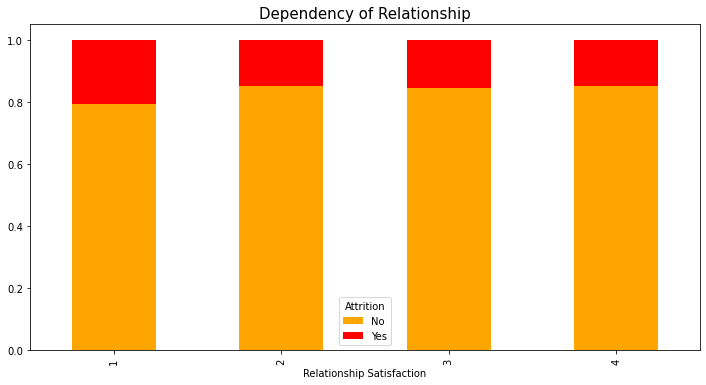

In [99]:
data=pd.crosstab(df['RelationshipSatisfaction'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['orange', 'red'], 
                                                figsize=(12,6))
plt.title('Dependency of Relationship', fontsize=15)
plt.xlabel('Relationship Satisfaction')
plt.show()

- Relationship does not affect Attrition that much but yes having very less Relationship Satisfaction may prone to employee to quit job

# Education Field

In [108]:
df.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

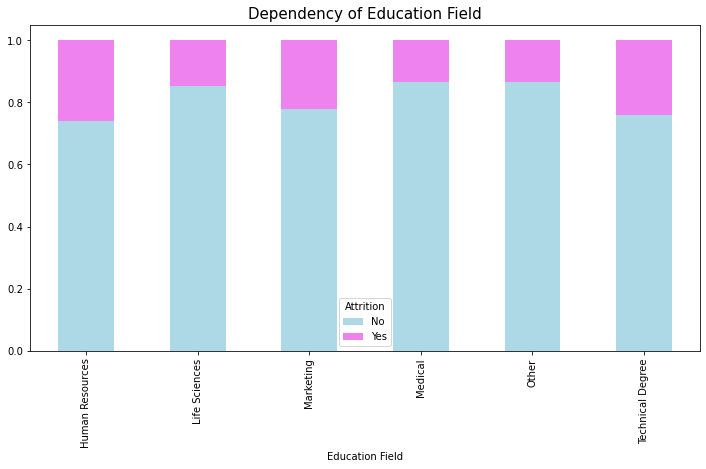

In [116]:
data=pd.crosstab(df['EducationField'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['lightblue', 'violet'], 
                                                figsize=(12,6))
plt.title('Dependency of Education Field', fontsize=15)
plt.xlabel('Education Field')
plt.show()

- Very Less Attrition Rate in Medical and Life Sciences Field
- High Attrition in Marketing Field due to Work Pressure

# WorkLifeBalance

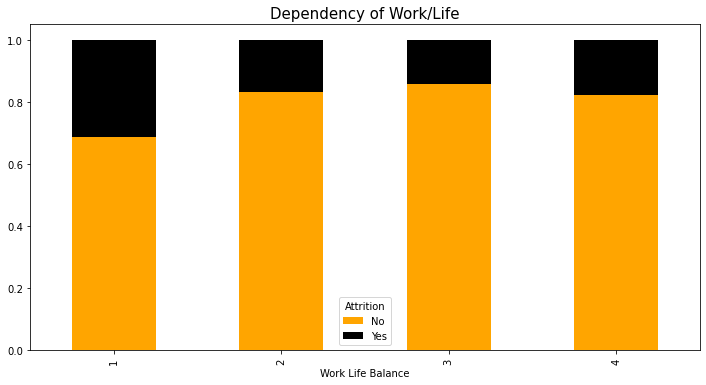

In [117]:
data=pd.crosstab(df['WorkLifeBalance'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['orange', 'black'], 
                                                figsize=(12,6))
plt.title('Dependency of Work/Life', fontsize=15)
plt.xlabel('Work Life Balance')
plt.show()

-Poor Work Life Balance trigger Employee to quit Job

# Marital Status

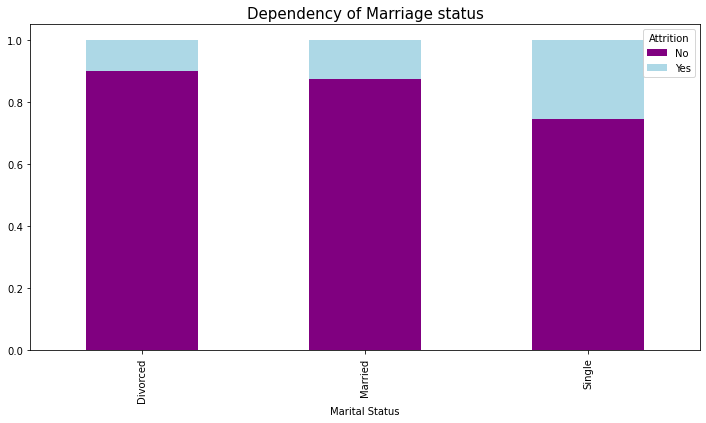

In [122]:
data=pd.crosstab(df['MaritalStatus'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['purple', 'lightblue'], 
                                                figsize=(12,6))
plt.title('Dependency of Marriage status', fontsize=15)
plt.xlabel('Marital Status')
plt.show()

- Bachelors move towards other companies frequently in search for a well settled job.But,this is a weak predictor

# Comparison of Gender with other Factors

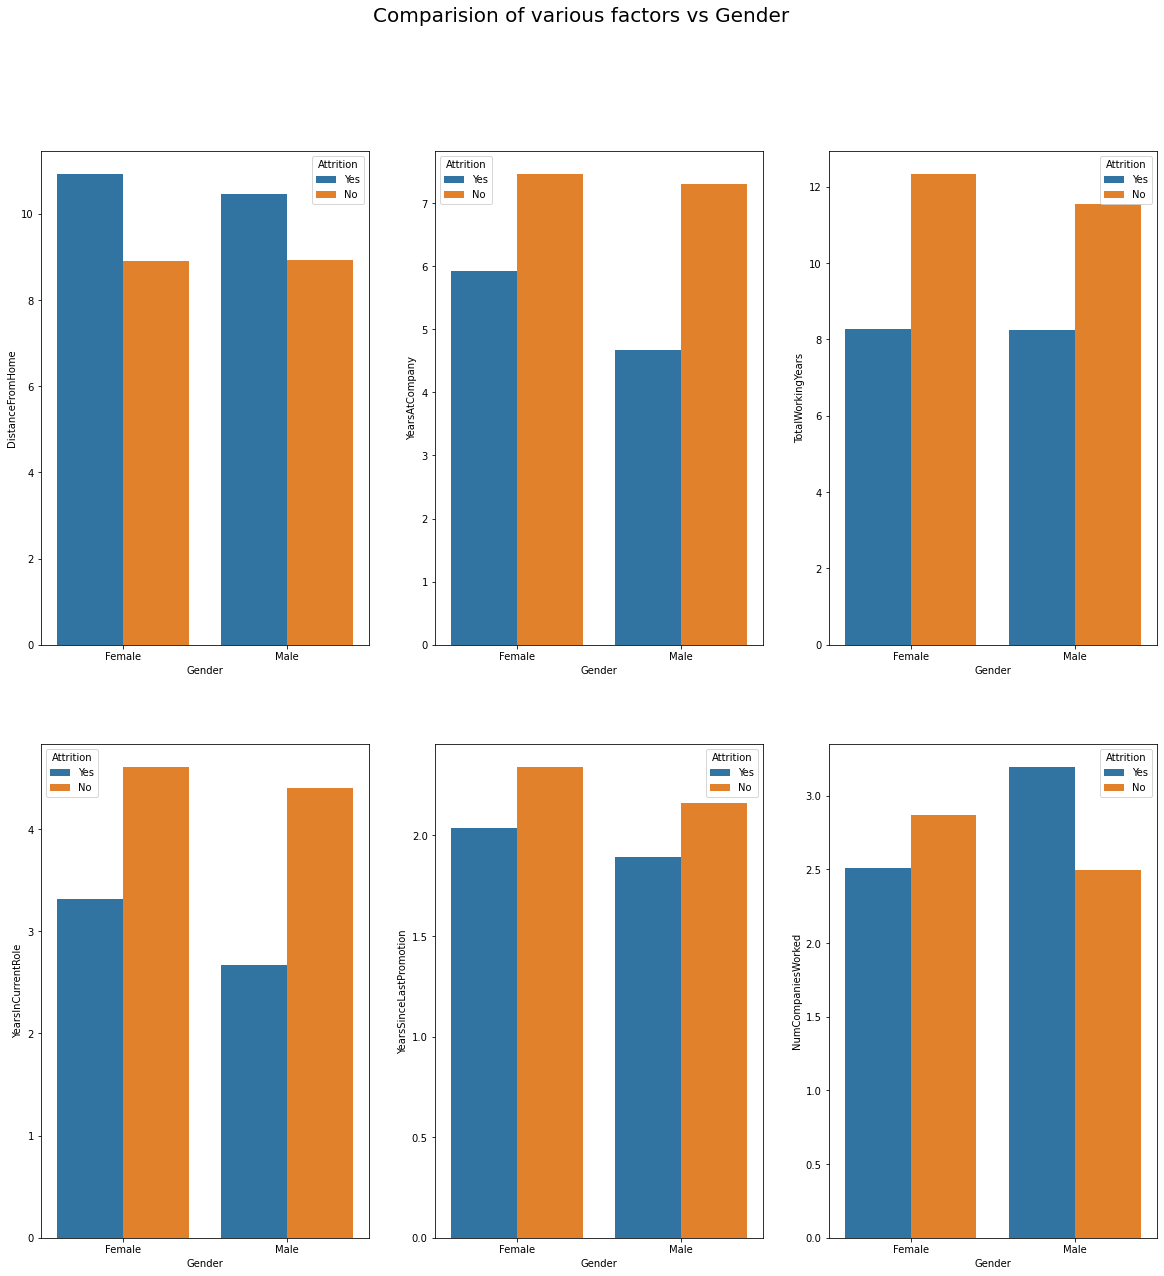

In [127]:
fig,ax = plt.subplots(2,3, figsize=(20,20))           
plt.suptitle("Comparision of various factors vs Gender", fontsize=20)
sns.barplot(df['Gender'],df['DistanceFromHome'],hue = df['Attrition'], ax = ax[0,0],ci=None); 
sns.barplot(df['Gender'],df['YearsAtCompany'],hue = df['Attrition'], ax = ax[0,1],ci=None); 
sns.barplot(df['Gender'],df['TotalWorkingYears'],hue = df['Attrition'], ax = ax[0,2],ci=None); 
sns.barplot(df['Gender'],df['YearsInCurrentRole'],hue = df['Attrition'], ax = ax[1,0],ci=None); 
sns.barplot(df['Gender'],df['YearsSinceLastPromotion'],hue = df['Attrition'], ax = ax[1,1],ci=None); 
sns.barplot(df['Gender'],df['NumCompaniesWorked'],hue = df['Attrition'], ax = ax[1,2],ci=None); 
plt.show()

- Distance from Home matters more Female as comared with Male
- Female Employees spent more years in one company,than Male.

   # Pre processing / Model Instatiation

In [212]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [138]:
#From EDA dropping Variables that are not necessary
df1=df.drop(columns=["EmployeeCount","EmployeeNumber","Gender","HourlyRate","Over18","StandardHours"],axis=1)

In [139]:
#Seperating Numerical and Categorical Variables

dict(df1.dtypes)

{'Age': dtype('int64'),
 'Attrition': dtype('O'),
 'BusinessTravel': dtype('O'),
 'DailyRate': dtype('int64'),
 'Department': dtype('O'),
 'DistanceFromHome': dtype('int64'),
 'Education': dtype('int64'),
 'EducationField': dtype('O'),
 'EnvironmentSatisfaction': dtype('int64'),
 'JobInvolvement': dtype('int64'),
 'JobLevel': dtype('int64'),
 'JobRole': dtype('O'),
 'JobSatisfaction': dtype('int64'),
 'MaritalStatus': dtype('O'),
 'MonthlyIncome': dtype('int64'),
 'MonthlyRate': dtype('int64'),
 'NumCompaniesWorked': dtype('int64'),
 'OverTime': dtype('O'),
 'PercentSalaryHike': dtype('int64'),
 'PerformanceRating': dtype('int64'),
 'RelationshipSatisfaction': dtype('int64'),
 'StockOptionLevel': dtype('int64'),
 'TotalWorkingYears': dtype('int64'),
 'TrainingTimesLastYear': dtype('int64'),
 'WorkLifeBalance': dtype('int64'),
 'YearsAtCompany': dtype('int64'),
 'YearsInCurrentRole': dtype('int64'),
 'YearsSinceLastPromotion': dtype('int64'),
 'YearsWithCurrManager': dtype('int64')}

In [140]:
num_var_nam=[key for key in dict(df1.dtypes) if dict(df1.dtypes)[key] in ['float32','int32','float64','int64']]

In [141]:
cat_var_nam=[key for key in dict(df1.dtypes) if dict(df1.dtypes)[key] in ['object']]
cat_var_nam

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [142]:
#Storing Both in different dataset
df_num=df1[num_var_nam]
df_cat=df1[cat_var_nam]

In [144]:
df_cat.drop(columns=['Attrition'])

,BusinessTravel,Department,EducationField,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Laboratory Technician,Married,No
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Laboratory Technician,Married,No
1466,Travel_Rarely,Research & Development,Medical,Healthcare Representative,Married,No
1467,Travel_Rarely,Research & Development,Life Sciences,Manufacturing Director,Married,Yes
1468,Travel_Frequently,Sales,Medical,Sales Executive,Married,No


In [145]:
#Converting into dummy variables
df_cat=pd.get_dummies(df_cat)

In [147]:
#Merging Both Datasets
df_final=pd.concat([df_num,df_cat,df1[["Attrition"]]],axis=1)

In [150]:
df_final=df_final.drop(columns=['Attrition_No','Attrition_Yes'],axis=1)
df_final.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Attrition
0,41,1102,1,2,2,3,2,4,5993,19479,...,0,0,1,0,0,0,1,0,1,Yes
1,49,279,8,1,3,2,2,2,5130,24907,...,0,1,0,0,0,1,0,1,0,No
2,37,1373,2,2,4,2,1,3,2090,2396,...,0,0,0,0,0,0,1,0,1,Yes
3,33,1392,3,4,4,3,1,3,2909,23159,...,0,1,0,0,0,1,0,0,1,No
4,27,591,2,1,1,3,1,2,3468,16632,...,0,0,0,0,0,1,0,1,0,No


# Seperating Features and Label

In [151]:
#Seperating Variables and Predictors
X=df_final.drop(columns=['Attrition'])
y=df_final["Attrition"]

In [154]:
#Train Test Split with stratified sampling of y

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=100)

# Making Pipeline for Decision Tree Model

In [156]:


from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

pipe = {
    "clf":make_pipeline(DecisionTreeClassifier(max_depth=3 , random_state=100))
}

** CROSS VALIDATE TO CHECK ACCURACY OF PIPELINE

In [157]:
score = cross_validate(pipe['clf'],x_train,y_train,return_train_score=True)

In [158]:
score['test_score'].mean()

0.8386881363959271

# Average Accuracy of Pipeline with Decision Tree is 83.86%

***********************************************************************************************

# Cross Validation and Hyper parameter Tuning

In [180]:
dt_hp={
    "decisiontreeclassifier__max_depth":np.arange(3,12),
    "decisiontreeclassifier__max_features":np.arange(3,10),
    "decisiontreeclassifier__min_samples_split":[2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    "decisiontreeclassifier__min_samples_leaf":np.arange(1,3)
    }

In [175]:
DecisionTreeClassifier().get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [181]:
pipe['clf']

Pipeline(steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=3, random_state=100))])

- DECISION TREE CLASSIFIER WITH GINI INDEX

In [182]:
clf_model = GridSearchCV(pipe['clf'],dt_hp,cv=5,n_jobs=-1)

#We are doing 5 fold CV

In [183]:
clf_model.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('decisiontreeclassifier',
                                        DecisionTreeClassifier(max_depth=3,
                                                               random_state=100))]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11]),
                         'decisiontreeclassifier__max_features': array([3, 4, 5, 6, 7, 8, 9]),
                         'decisiontreeclassifier__min_samples_leaf': array([1, 2]),
                         'decisiontreeclassifier__min_samples_split': [2, 3, 4,
                                                                       5, 6, 7,
                                                                       8, 9, 10,
                                                                       11, 12,
                                                                       13, 14,
                                             

In [184]:
#Displaying Best Parameters for decision tree model

clf_model.best_params_

{'decisiontreeclassifier__max_depth': 4,
 'decisiontreeclassifier__max_features': 8,
 'decisiontreeclassifier__min_samples_leaf': 2,
 'decisiontreeclassifier__min_samples_split': 2}

In [185]:
#Displaying best Score for fitted model
clf_model.best_score_

0.8464456547478096

In [188]:
#Using string names to get the decision tree classifier in pipeline
clf_model.best_estimator_.named_steps['decisiontreeclassifier']

DecisionTreeClassifier(max_depth=4, max_features=8, min_samples_leaf=2,
                       random_state=100)

In [189]:
clf_best_model=clf_model.best_estimator_.named_steps['decisiontreeclassifier']

- Hence, we are able to achieve higher score with Hyperparameter Tuning

- Model Prediction on test data

In [213]:
y_test_p = clf_model.predict(x_test)

In [216]:
tree_test_pred=pd.concat([y_test.reset_index(drop=True),pd.DataFrame(y_test_p)],axis=1)
tree_test_pred.columns=["actual","predicted"]
tree_test_pred.index=y_test.index

In [217]:
tree_test_pred.head()

,actual,predicted
34,Yes,No
1432,No,No
334,No,No
1068,Yes,No
736,No,No


# Confusion Matrix

In [199]:
metrics.confusion_matrix(tree_test_pred.actual,tree_test_pred.predicted,labels=["Yes","No"])

array([[  6,  65],
       [ 13, 357]], dtype=int64)

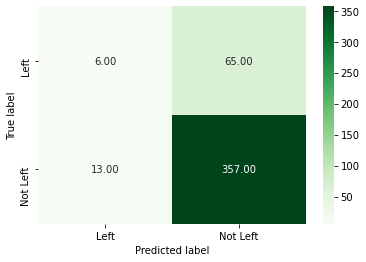

In [206]:
#Confusion Matrix Visualization
sns.heatmap(metrics.confusion_matrix(tree_test_pred.actual,tree_test_pred.predicted,labels=["Yes","No"]),
            cmap="Greens",annot=True,fmt=".2f",
           xticklabels = ["Left", "Not Left"] , yticklabels = ["Left", "Not Left"])

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [208]:
print(metrics.classification_report(tree_test_pred.actual,tree_test_pred.predicted))

              precision    recall  f1-score   support

          No       0.85      0.96      0.90       370
         Yes       0.32      0.08      0.13        71

    accuracy                           0.82       441
   macro avg       0.58      0.52      0.52       441
weighted avg       0.76      0.82      0.78       441



# Saving Model

In [220]:
final_model=clf_model
clf_model.fit(X,y)
dump(final_model,'Attrition.pk')

['Attrition.pk']